<a href="https://colab.research.google.com/github/DmitriiDenisov/research_oversampling/blob/master/Research_gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.
- One random point
- 2D plane

In [1]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# Generates random point in rectangle [xy_min; xy_max]
def generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20]):
    data = np.random.uniform(low=xy_min, high=xy_max, size=(n,2))
    return data

# Returns directional vector
def get_vector_two_points(two_points):
    return two_points[1] - two_points[0]

In [3]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 7.71237912 13.62613477]
 [ 0.6360343  10.31233033]]
[-7.07634481 -3.31380444]


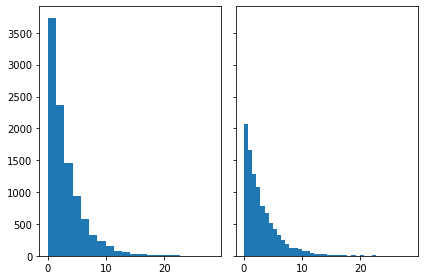

In [4]:
# JUST CHECKING how Gamma dist is look like

N_points = 100000
n_bins = 20

shape, scale = 1., 3.  # mean=4, std=2*sqrt(2)
s = np.random.gamma(shape, scale, 10000)


fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(s, bins=n_bins)
axs[1].hist(s, bins=2*n_bins)
plt.show()

In [5]:
# Generates normilized Gamma distributed value
def generate_gamma():
    shape, scale = 1., 3.
    s = np.random.gamma(shape, scale, 1)[0]
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [6]:
gamma_coeff = generate_gamma()

In [7]:
# Generates new point on line between two initial points
def generate_point_on_line(start_point, v, gamma_coeff):
    return start_point + v * gamma_coeff

In [8]:
generated_point = generate_point_on_line(two_points[0], v, gamma_coeff)

In [9]:
# For visualazion:
initial_points_and_generated = np.concatenate((two_points, generated_point[np.newaxis, :]), axis=0)
initial_points_and_generated

array([[ 7.71237912, 13.62613477],
       [ 0.6360343 , 10.31233033],
       [ 7.16232493, 13.36854811]])

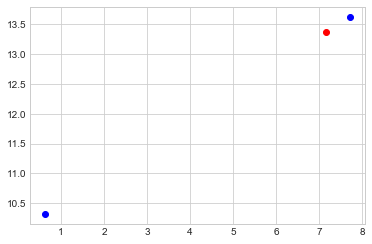

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_point[np.newaxis, :]))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');

## 2.
- Multiple Random points
- 2D plane

In [11]:
NUM_RAND_POINTS = 20

In [12]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[ 1.73007817 13.94103643]
 [ 8.08050487  8.77387994]]
[ 6.3504267  -5.16715649]


In [13]:
gamma_coeff = generate_gamma()

generated_points = generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

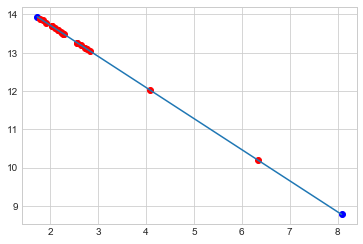

In [14]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, 'o', color='red');
plt.plot(initial_x, initial_y, '-');

In [15]:
generated_points

array([[ 2.2254007 , 13.53800698],
       [ 1.8444208 , 13.84799918],
       [ 4.08666407, 12.0235514 ],
       [ 2.27573086, 13.49705479],
       [ 1.92426542, 13.78303195],
       [ 2.09504255, 13.64407559],
       [ 2.73055889, 13.12697453],
       [ 2.25778846, 13.511654  ],
       [ 2.28446156, 13.48995088],
       [ 6.34177043, 10.18863731],
       [ 2.56615785, 13.26074285],
       [ 2.03191922, 13.6954372 ],
       [ 2.03337468, 13.69425293],
       [ 2.16107975, 13.59034305],
       [ 2.56151009, 13.2645246 ],
       [ 2.83323226, 13.04343221],
       [ 2.6351772 , 13.20458382],
       [ 2.15488365, 13.59538463],
       [ 2.7693122 , 13.09544209],
       [ 1.78724608, 13.89452058]])

In [16]:
two_points

array([[ 1.73007817, 13.94103643],
       [ 8.08050487,  8.77387994]])

## 3.
- One Random point
- n dimentional space

In [17]:
# Generates n random points in hypercube [xy_min; xy_max]
def generate_random_point_nd(num_points=2, n=10, min_=0, max_=10):
    xy_min = [min_] * n
    xy_max = [max_] * n
    data = np.random.uniform(low=xy_min, high=xy_max, size=(num_points, n))
    return data

In [18]:
two_points_nd = generate_random_point_nd(num_points=2, n=10)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == 10
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[2.23771905 9.01006893 6.43132648 6.77674915 0.29235922 6.80838343
  7.441276   1.77340876 3.00193064 2.70271913]
 [9.9260083  1.62157718 2.20636596 0.83185377 3.11178952 5.60342623
  0.75377314 0.82897134 1.88898048 1.37261227]]
[ 7.68828926 -7.38849175 -4.22496052 -5.94489538  2.81943029 -1.2049572
 -6.68750286 -0.94443743 -1.11295016 -1.33010686]


In [19]:
gamma_coeff = generate_gamma()

In [20]:
generated_point = generate_point_on_line(two_points_nd[0], v, gamma_coeff)
generated_point

array([2.44963409, 8.80641732, 6.31487239, 6.61288789, 0.37007218,
       6.77517077, 7.25694599, 1.7473769 , 2.971254  , 2.66605692])

In [21]:
def test_points_on_line(p1, p2, list_p3, tol=10):
    # Calculate two vectors and check if they are collinear
    if len(list_p3.shape) == 1:
        list_p3 = list_p3[np.newaxis, :]
    vec_1 = p2 - p1
    for p3 in list_p3:
        vec_2 = (p3 - p1) / vec_1
        # take unique values
        unique_arr = np.unique(vec_2[~np.isnan(vec_2)].round(decimals=tol))
        if len(unique_arr) > 1:
          return False
        # Check that if nan then there were two zeros
        idx = np.where(~np.isfinite(vec_2))[0]
        if idx.size:
          if not (all((p3 - p1)[idx] == vec_1[idx]) and all(vec_1[idx] == 0)):
            return False
        return True
    return True

In [22]:
# Testing
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_point)

## 4.
- Multiple Random points
- n dimentional space

In [23]:
NUM_RAND_POINTS = 20
N_FEATURES = 10

In [24]:
two_points_nd = generate_random_point_nd(num_points=2, n=N_FEATURES)
assert two_points_nd.shape[0] == 2
assert two_points_nd.shape[1] == N_FEATURES
print(two_points_nd)
# get vector for these two points
v = get_vector_two_points(two_points_nd)
print(v)

[[9.75891661 0.16675255 1.89851805 1.67348149 7.52901742 9.90405387
  6.56781737 4.51821545 5.03117449 2.12391792]
 [7.51073237 9.40493974 5.60837589 9.474033   4.85549314 5.66412081
  4.46107096 1.86718046 7.42952895 5.414907  ]]
[-2.24818424  9.23818719  3.70985784  7.80055151 -2.67352428 -4.23993306
 -2.1067464  -2.65103499  2.39835446  3.29098908]


In [25]:
gamma_coeff = generate_gamma()

generated_points = generate_point_on_line(two_points_nd[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_RAND_POINTS - 1):
    gamma_coeff = generate_gamma()
    generated_points = np.concatenate((generate_point_on_line(two_points_nd[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)
    
assert generated_points.shape[0] == NUM_RAND_POINTS
assert generated_points.shape[1] == N_FEATURES

In [26]:
assert test_points_on_line(two_points_nd[0], two_points_nd[1], generated_points)

## 5.
- Generalization of the approach for n minority points for n dimentional space

In [27]:
NUM_RAND_POINTS = 20
NUM_MINORITY_POINTS = 5
N_FEATURES = 10
NUM_TO_ADD = 15

In [28]:
minority_points_nd = generate_random_point_nd(num_points=NUM_MINORITY_POINTS, n=N_FEATURES)
assert minority_points_nd.shape[0] == NUM_MINORITY_POINTS
assert minority_points_nd.shape[1] == N_FEATURES
# print(two_points_nd)
# get vector for these two points
# v = get_vector_two_points(N_points_nd)
# print(v)

In [29]:
def generate_points_for_n_minority(minority_points, num_to_add):
  n_features = minority_points.shape[1]
  dict_ans = defaultdict(lambda: np.array([]).reshape(0, n_features))
  # Choose random pairs with repetition:
  all_comb = np.array(list(itertools.combinations(range(len(minority_points)), r=2)))
  rand_idx = np.random.choice(range(len(all_comb)), num_to_add, replace=True)
  assert rand_idx.shape == (num_to_add, )
  # print(rand_idx)
  # print(all_comb)
  all_comb = all_comb[rand_idx]
  # assert random_choice_minority.shape[0] == num_to_add and random_choice_minority.shape[1] == 2
  for i, (idx1, idx2) in enumerate(all_comb):
    v = get_vector_two_points([minority_points[idx1], minority_points[idx2]])
    gamma_coeff = generate_gamma()
    generated_point = generate_point_on_line(minority_points[idx1], v, gamma_coeff)
    minority_points = np.concatenate((minority_points, generated_point[np.newaxis, :]), axis=0)
    dict_ans[tuple(all_comb[i])] = np.vstack([dict_ans[tuple(all_comb[i])], generated_point])
    
  return minority_points, dict_ans # return concatenated initial+generated points and dict for testing


In [30]:
minority_points, dict_ans = generate_points_for_n_minority(minority_points_nd, num_to_add=NUM_TO_ADD)

In [31]:
minority_points_nd

array([[5.97573821, 6.80227168, 7.68917798, 6.3062701 , 4.32099569,
        3.87517652, 9.6065836 , 6.32732803, 2.97019576, 0.36655715],
       [3.59606926, 7.65816546, 8.64427442, 5.68664559, 2.94524222,
        2.32742557, 2.80226307, 7.23351198, 3.39339972, 5.84203615],
       [0.25049098, 8.74530984, 6.12544959, 9.80237256, 1.54228462,
        7.62747247, 0.9252579 , 1.54160188, 8.47574585, 7.97992957],
       [5.89415014, 6.29451856, 1.75378294, 1.98420473, 8.19443599,
        7.6730696 , 1.93987945, 5.85896336, 8.77865779, 0.31367552],
       [4.07444226, 3.98980277, 9.43818592, 9.88002305, 9.13908262,
        9.30270935, 7.75213929, 8.15727095, 9.94980216, 9.86632539]])

In [32]:
minority_points

array([[5.97573821, 6.80227168, 7.68917798, 6.3062701 , 4.32099569,
        3.87517652, 9.6065836 , 6.32732803, 2.97019576, 0.36655715],
       [3.59606926, 7.65816546, 8.64427442, 5.68664559, 2.94524222,
        2.32742557, 2.80226307, 7.23351198, 3.39339972, 5.84203615],
       [0.25049098, 8.74530984, 6.12544959, 9.80237256, 1.54228462,
        7.62747247, 0.9252579 , 1.54160188, 8.47574585, 7.97992957],
       [5.89415014, 6.29451856, 1.75378294, 1.98420473, 8.19443599,
        7.6730696 , 1.93987945, 5.85896336, 8.77865779, 0.31367552],
       [4.07444226, 3.98980277, 9.43818592, 9.88002305, 9.13908262,
        9.30270935, 7.75213929, 8.15727095, 9.94980216, 9.86632539],
       [1.13764581, 7.64203452, 6.8940028 , 9.82038743, 3.30473804,
        8.01612661, 2.50909105, 3.07643387, 8.8177262 , 8.41757248],
       [5.71827953, 6.89487166, 7.79251079, 6.23923233, 4.17215159,
        3.70772384, 8.87041758, 6.42536894, 3.01598261, 0.95895452],
       [4.2357554 , 7.39278819, 7.2139390

In [33]:
# testing:
n_points = 0
for key, points in dict_ans.items():
  for point in points:
    n_points+=1
    assert test_points_on_line(minority_points_nd[key[1]], minority_points_nd[key[0]], point)
assert n_points == NUM_TO_ADD

## 6.
- Gamma distribution with negative values

In [34]:
NUM_POINTS = 50

In [35]:
# Generate two Random point2:
two_points = generate_random_point(n=2, xy_min=[0, 0], xy_max=[10, 20])
print(two_points)
# get vector for these two points
v = get_vector_two_points(two_points)
print(v)

[[1.59063843e-02 1.38319884e+01]
 [4.60203757e+00 1.68090985e+01]]
[4.58613119 2.97711006]


In [36]:
def max_pdf_gamma(k, theta):
  return (k-1) * theta

def generate_gamma_negative():
    k, theta = 3, 2.1
    s = np.random.gamma(k, theta, 1)[0]
    s = s - max_pdf_gamma(k, theta) # shift by X axis
    if (s > 20): # заглушка пока что
        s = 20
    s = s / 20
    return s

In [37]:
gamma_coeff = generate_gamma_negative()

generated_points = generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :]

for i in range(NUM_POINTS - 1):
    gamma_coeff = generate_gamma_negative()
    generated_points = np.concatenate((generate_point_on_line(two_points[0], v, gamma_coeff)[np.newaxis, :], generated_points),
                                      axis=0)

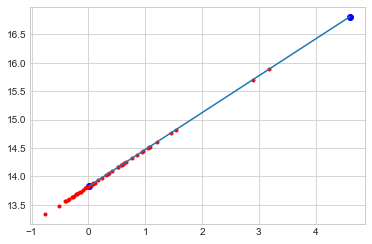

In [38]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np


initial_x, initial_y = map(list, zip(*two_points))
generated_x, generated_y = map(list, zip(*generated_points))

plt.plot(initial_x, initial_y, 'o', color='blue');
plt.plot(generated_x, generated_y, '.', color='red');
plt.plot(initial_x, initial_y, '-');

## 7. Apply to real datasets

In [ ]:
!pip install imbalanced-learn==0.5

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7.
    27% |████████▋                       | 11.7MB 1.5MB/s eta 0:00:21

In [ ]:
import imblearn
imblearn.__version__

In [ ]:
from imblearn.datasets import make_imbalance
from sklearn.preprocessing import StandardScaler
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score
import pandas as pd

In [ ]:
def get_dataset_pd(name):
  X = pd.DataFrame(fetch_datasets()[name]['data'])
  target = pd.DataFrame(fetch_datasets()[name]['target']).replace(-1, 0)
  assert target.shape[0] == X.shape[0]
  return X, target

In [ ]:
def aug_train(X_temp):
  # Подавать внутрь датафрейм X_temp с колонкой y
  num_zeros = X_temp[X_temp['y'] == 0].to_numpy().shape[0]
  num_ones = X_temp[X_temp['y'] == 1].to_numpy().shape[0]

  num_add = num_zeros - num_ones
  minority_points = X_temp[X_temp['y'] == 1].drop('y', 1).to_numpy()

  minority_points, dict_ans = generate_points_for_n_minority(minority_points, num_add)
  assert minority_points.shape[0] == X_temp[X_temp['y'] == 1].to_numpy().shape[0] + num_add 
  assert num_zeros == minority_points.shape[0]

  # testing:
  initial_rows = X_temp[X_temp['y'] == 1].to_numpy().shape[0]
  n_points = 0
  for key, points in dict_ans.items():
    for point in points:
      n_points+=1
      assert key[1] <= initial_rows and key[0] <= initial_rows
      assert test_points_on_line(minority_points[key[1]], minority_points[key[0]], point)
  assert n_points == num_add
  assert np.all(np.equal(minority_points[:initial_rows], X_temp[X_temp['y'] == 1].drop('y', 1).to_numpy()))

  X_aug = np.concatenate((X_temp[X_temp['y'] == 0].drop('y', 1).to_numpy(), minority_points), axis=0)
  y_aug = np.array([0] * num_zeros + [1] * num_zeros)
  assert X_aug.shape[0] == 2 * num_zeros
  assert y_aug.shape[0] == X_aug.shape[0]

  df_new = pd.DataFrame(X_aug)
  df_new['y'] = y_aug

  return df_new

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
# 1. Get dataset:
X, y = get_dataset_pd('abalone')

# 2. Split on test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # random_state=42

# 3. Fit:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# 4. Predict and metrics:
y_pred = clf.predict(X_test)
print(f1_score(y_test.to_numpy().flatten(), y_pred))
print(precision_score(y_test.to_numpy().flatten(), y_pred))
print(recall_score(y_test.to_numpy().flatten(), y_pred)) 

In [ ]:
y_pred.sum()

In [ ]:
# 1. Get dataset:
X, y = get_dataset_pd('abalone')

# 2. Split on test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # random_state=42

# 3. Augment train part by generating new minority points
X_train['y'] = y_train
X_train_aug = aug_train(X_train)

# 4. Shuffle
X_train_aug = X_train_aug.sample(frac=1) # shuffle

# 5. Drop target from train
y_train_aug = X_train_aug['y']
X_train_aug = X_train_aug.drop('y', 1)

# 6. Fit:
clf = RandomForestClassifier()
clf.fit(X_train_aug, y_train_aug)

# 7. Predict and metrics:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred)) 


In [ ]:
X_train

In [ ]:
X_test

In [ ]:
X

In [ ]:
y_test.to_numpy().flatten() - y_pred

In [ ]:

df_new

In [ ]:
X.shape